**导入库**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import datasets
import seaborn as sns
from matplotlib.colors import ListedColormap


**生成数据集**

In [2]:
X, y = datasets.make_blobs(n_samples=400, n_features=2, centers=4, random_state=0)

**划分训练集和测试集**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**训练模型并评估**

In [5]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN分类准确率:", accuracy_knn)

# 逻辑回归
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("逻辑回归分类准确率:", accuracy_lr)

# 高斯朴素贝叶斯
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("高斯朴素贝叶斯分类准确率:", accuracy_gnb)

KNN分类准确率: 0.925
逻辑回归分类准确率: 0.925
高斯朴素贝叶斯分类准确率: 0.9125


**绘制带边界分类图**

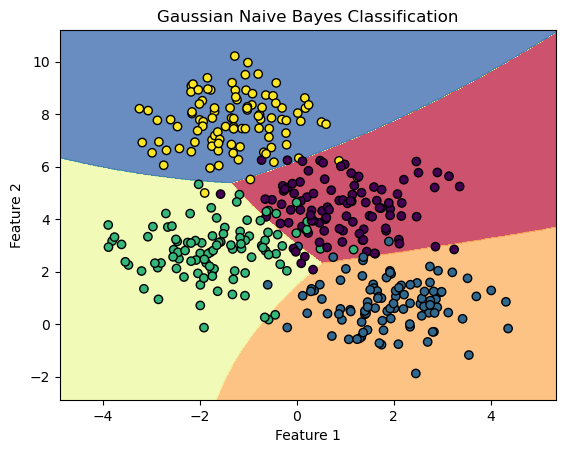

In [6]:
# 创建一个网格，用于绘制决策边界
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 在网格上预测每个点的类别
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes Classification')
plt.show()